# Telecom X - Parte 2

##  📌 Extração de Dados

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
dados_df = pd.read_csv('dados_df.csv')

In [111]:
dados_df.head()

,Unnamed: 0,cancelou,genero,tempo_contrato_meses,tipo_contrato,idoso,tem_conjuge,tem_dependentes,fatura_digital,forma_pagamento,mensalidade,gasto_total,Contas_Diarias
0,0,0,Feminino,9,Anual,0,1,1,1,Cheque Correio,65.6,593.30,2.186667
1,1,0,Masculino,9,Mensal,0,0,0,0,Cheque Correio,59.9,542.40,1.996667
2,2,1,Masculino,4,Mensal,0,0,0,1,Cheque Eletrônico,73.9,280.85,2.463333
3,3,1,Masculino,13,Mensal,1,1,0,1,Cheque Eletrônico,98.0,1237.85,3.266667
4,4,1,Feminino,3,Mensal,1,1,0,1,Cheque Correio,83.9,267.40,2.796667


## 🔧 Transformação

In [112]:
dados_df = dados_df.drop('Unnamed: 0', axis=1)

### Dummies
Tranformando as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning

In [113]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cancelou              7043 non-null   int64  
 1   genero                7043 non-null   object 
 2   tempo_contrato_meses  7043 non-null   int64  
 3   tipo_contrato         7043 non-null   object 
 4   idoso                 7043 non-null   int64  
 5   tem_conjuge           7043 non-null   int64  
 6   tem_dependentes       7043 non-null   int64  
 7   fatura_digital        7043 non-null   int64  
 8   forma_pagamento       7043 non-null   object 
 9   mensalidade           7043 non-null   float64
 10  gasto_total           7043 non-null   float64
 11  Contas_Diarias        7043 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 660.4+ KB


In [114]:
colunas_categoricas = ['genero', 'tipo_contrato', 'forma_pagamento']
dados_df = pd.get_dummies(data = dados_df, columns = colunas_categoricas, dtype=int)

In [115]:
dados_df

,cancelou,tempo_contrato_meses,idoso,tem_conjuge,tem_dependentes,fatura_digital,mensalidade,gasto_total,Contas_Diarias,genero_Feminino,genero_Masculino,tipo_contrato_Anual,tipo_contrato_Bienal,tipo_contrato_Mensal,forma_pagamento_Cartão de Crédito (Automático),forma_pagamento_Cheque Correio,forma_pagamento_Cheque Eletrônico,forma_pagamento_Transferência Bancária (Automático)
0,0,9,0,1,1,1,65.60,593.30,2.186667,1,0,1,0,0,0,1,0,0
1,0,9,0,0,0,0,59.90,542.40,1.996667,0,1,0,0,1,0,1,0,0
2,1,4,0,0,0,1,73.90,280.85,2.463333,0,1,0,0,1,0,0,1,0
3,1,13,1,1,0,1,98.00,1237.85,3.266667,0,1,0,0,1,0,0,1,0
4,1,3,1,1,0,1,83.90,267.40,2.796667,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,0,0,0,0,55.15,742.90,1.838333,1,0,1,0,0,0,1,0,0
7039,1,22,0,1,0,1,85.10,1873.70,2.836667,0,1,0,0,1,0,0,1,0
7040,0,2,0,0,0,1,50.30,92.75,1.676667,0,1,0,0,1,0,1,0,0
7041,0,67,0,1,1,0,67.85,4627.65,2.261667,0,1,0,1,0,0,1,0,0


In [116]:
contagem_classes = dados_df['cancelou'].value_counts(normalize=True)
contagem_classes

,proportion
cancelou,
0,0.73463
1,0.26537


In [117]:
matriz_correlacao = dados_df.corr()
print(matriz_correlacao)

                                                    cancelou  \
cancelou                                            1.000000   
tempo_contrato_meses                               -0.352229   
idoso                                               0.150889   
tem_conjuge                                        -0.150448   
tem_dependentes                                    -0.164221   
fatura_digital                                      0.191825   
mensalidade                                         0.193356   
gasto_total                                        -0.198324   
Contas_Diarias                                      0.193356   
genero_Feminino                                     0.008612   
genero_Masculino                                   -0.008612   
tipo_contrato_Anual                                -0.177820   
tipo_contrato_Bienal                               -0.302253   
tipo_contrato_Mensal                                0.405103   
forma_pagamento_Cartão de Crédito (Autom

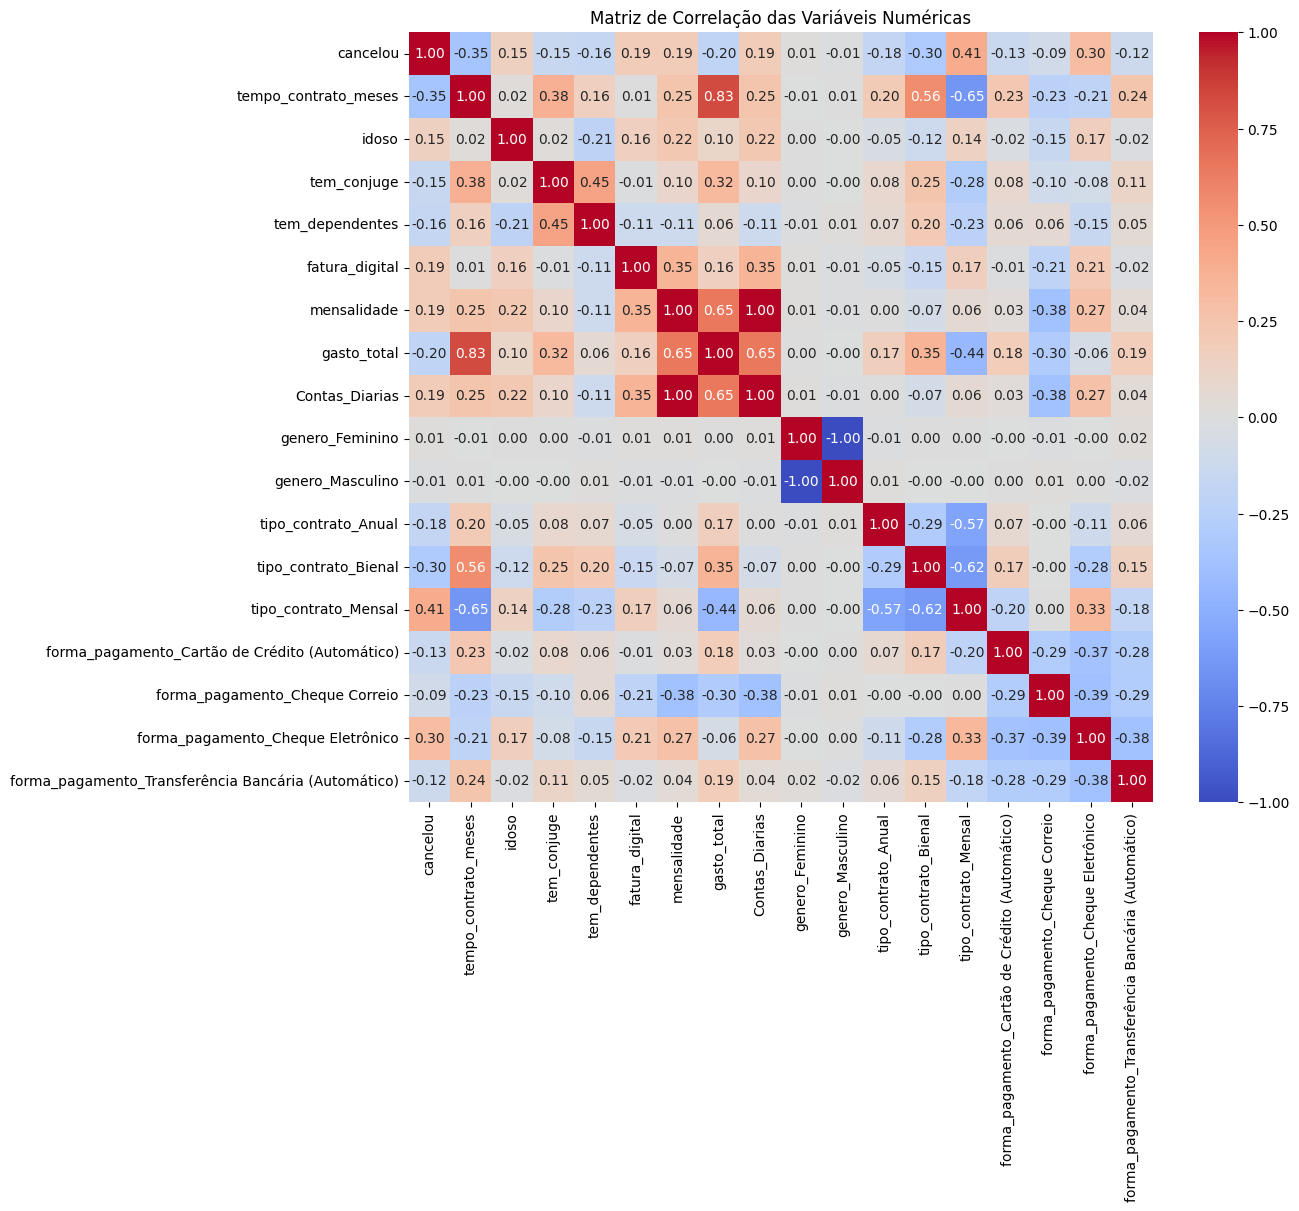

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')

plt.show()

In [119]:
dados_df.columns

Index(['cancelou', 'tempo_contrato_meses', 'idoso', 'tem_conjuge',
       'tem_dependentes', 'fatura_digital', 'mensalidade', 'gasto_total',
       'Contas_Diarias', 'genero_Feminino', 'genero_Masculino',
       'tipo_contrato_Anual', 'tipo_contrato_Bienal', 'tipo_contrato_Mensal',
       'forma_pagamento_Cartão de Crédito (Automático)',
       'forma_pagamento_Cheque Correio', 'forma_pagamento_Cheque Eletrônico',
       'forma_pagamento_Transferência Bancária (Automático)'],
      dtype='object')

In [120]:
# Verifique o tipo de dado da coluna
print(f"Tipo de dado da coluna 'gasto_total': {dados_df['gasto_total'].dtype}")

# Conte a quantidade de valores não numéricos (string vazia, espaços, etc.)
# Para isso, usaremos uma função lambda e apply
non_numeric_count = dados_df['gasto_total'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()
print(f"Quantidade de valores não numéricos (convertidos para NaN): {non_numeric_count}")

# Exiba as 10 primeiras linhas da coluna para inspecionar visualmente
print("Primeiras 10 linhas da coluna 'gasto_total':")
print(dados_df['gasto_total'].head(10))

Tipo de dado da coluna 'gasto_total': float64
Quantidade de valores não numéricos (convertidos para NaN): 0
Primeiras 10 linhas da coluna 'gasto_total':
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
5     571.45
6    7904.25
7    5377.80
8     340.35
9    5957.90
Name: gasto_total, dtype: float64


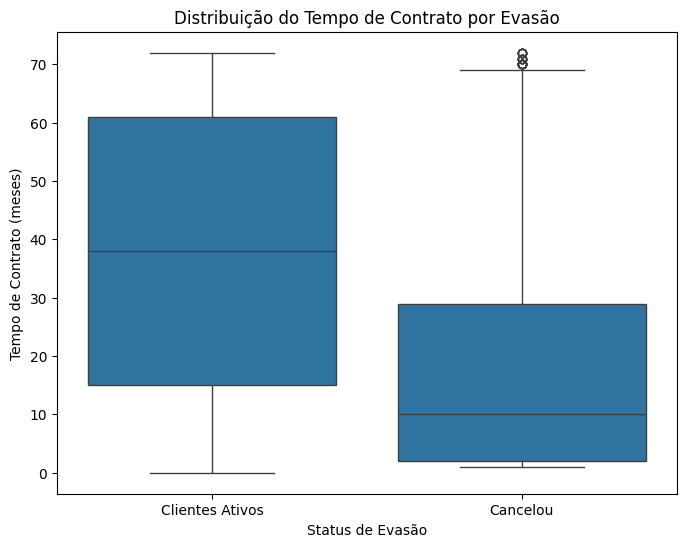

In [121]:
dados_df['cancelou'] = dados_df['cancelou'].map({0: 'Clientes Ativos', 1: 'Cancelou'})

plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='tempo_contrato_meses', data=dados_df)

plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Status de Evasão')
plt.ylabel('Tempo de Contrato (meses)')

plt.show()

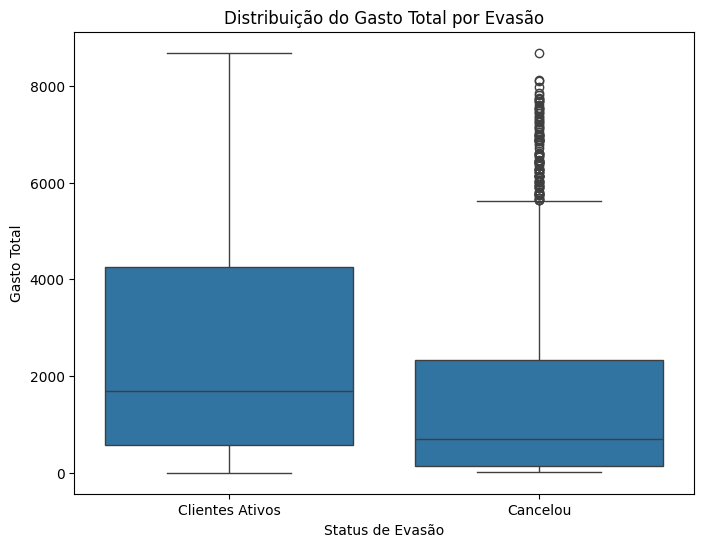

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cancelou', y='gasto_total', data=dados_df)

plt.title('Distribuição do Gasto Total por Evasão')
plt.xlabel('Status de Evasão')
plt.ylabel('Gasto Total')

plt.show()

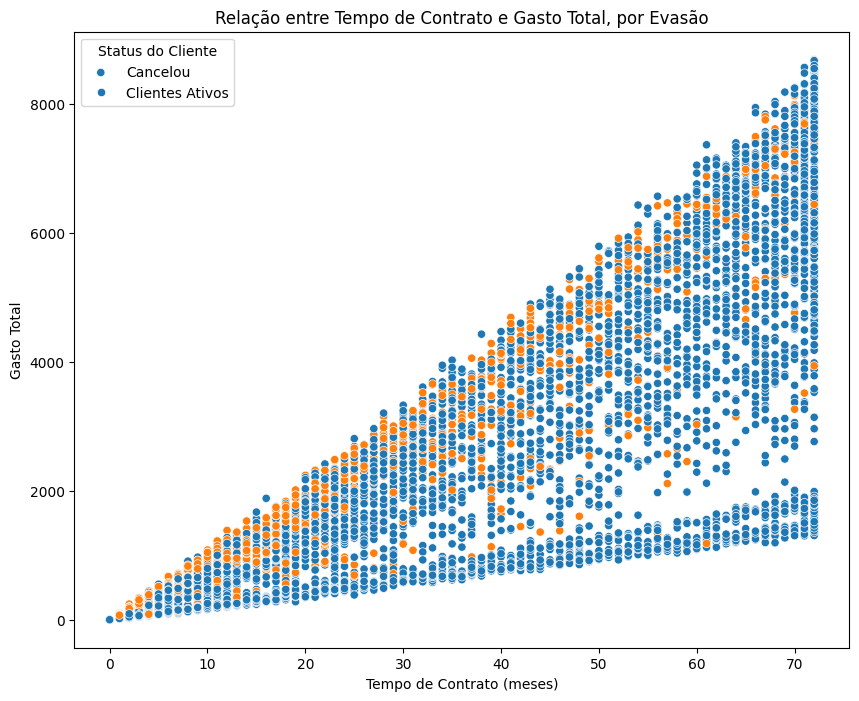

In [123]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tempo_contrato_meses', y='gasto_total', hue='cancelou', data=dados_df)

plt.legend(title='Status do Cliente', labels=['Cancelou', 'Clientes Ativos'])

plt.title('Relação entre Tempo de Contrato e Gasto Total, por Evasão')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Gasto Total')

plt.show()

In [124]:
from sklearn.model_selection import train_test_split
X = dados_df.drop('cancelou', axis=1)
y = dados_df['cancelou']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [126]:
arvore = DecisionTreeClassifier(max_depth=5, random_state=42)
arvore.fit(X_treino, y_treino)
previsoes_arvore = arvore.predict(X_teste)

print("--- Árvore de Decisão ---")
print("Acurácia:", accuracy_score(y_teste, previsoes_arvore))
print("Relatório de Classificação:")
print(classification_report(y_teste, previsoes_arvore))

--- Árvore de Decisão ---
Acurácia: 0.7893989588263133
Relatório de Classificação:
                 precision    recall  f1-score   support

       Cancelou       0.61      0.55      0.57       551
Clientes Ativos       0.85      0.88      0.86      1562

       accuracy                           0.79      2113
      macro avg       0.73      0.71      0.72      2113
   weighted avg       0.78      0.79      0.79      2113



In [127]:
floresta = RandomForestClassifier(max_depth=5, random_state=42)
floresta.fit(X_treino, y_treino)
previsoes_floresta = floresta.predict(X_teste)

print("--- Random Forest ---")
print("Acurácia:", accuracy_score(y_teste, previsoes_floresta))
print("Relatório de Classificação:")
print(classification_report(y_teste, previsoes_floresta))

--- Random Forest ---
Acurácia: 0.7974443918599148
Relatório de Classificação:
                 precision    recall  f1-score   support

       Cancelou       0.68      0.43      0.52       551
Clientes Ativos       0.82      0.93      0.87      1562

       accuracy                           0.80      2113
      macro avg       0.75      0.68      0.70      2113
   weighted avg       0.78      0.80      0.78      2113



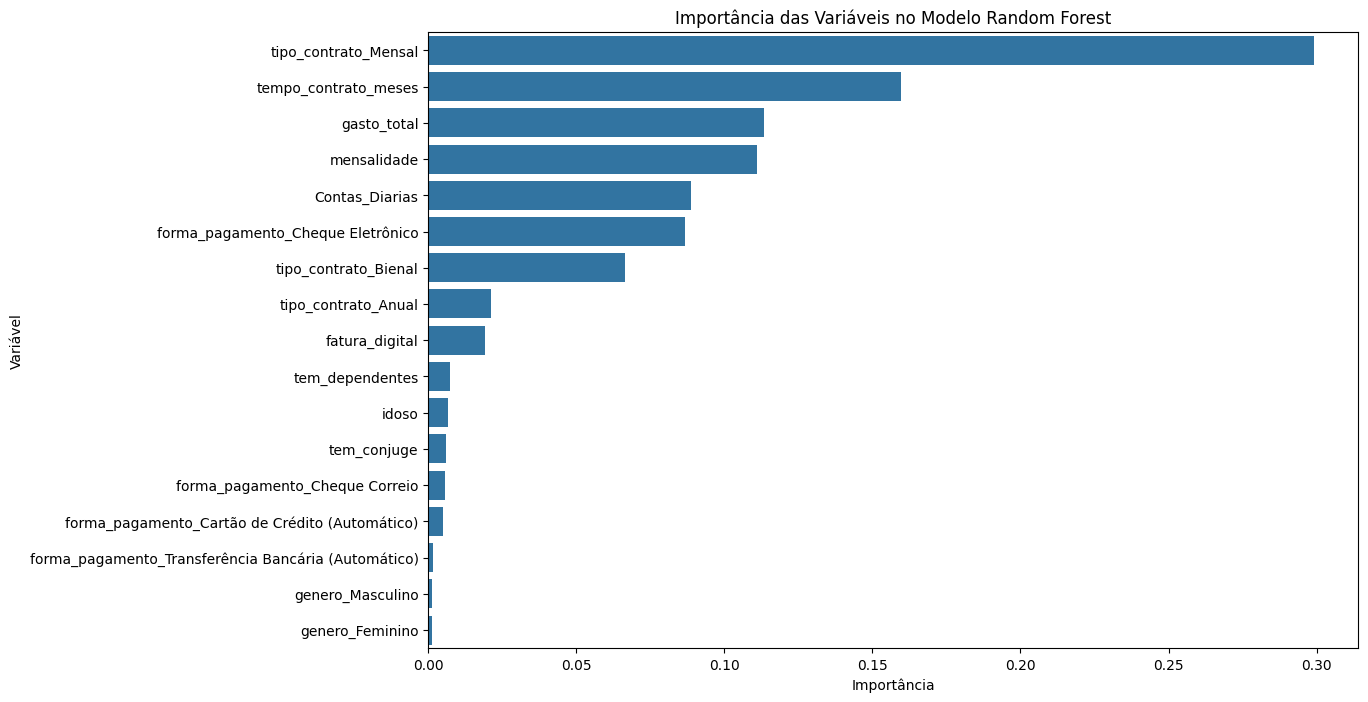

In [128]:
importancias = floresta.feature_importances_

nomes_colunas = X_treino.columns
importancias_df = pd.DataFrame({'Variavel': nomes_colunas, 'Importancia': importancias})

importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variavel', data=importancias_df)

plt.title('Importância das Variáveis no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

## Análise dos Modelos


# Relatório

### **Introdução e Objetivo**
Este relatório apresenta a análise e a avaliação de um modelo de machine learning, o Random Forest, construído para prever a evasão de clientes (churn) da Telecom X. O objetivo é avaliar a eficácia do modelo em identificar clientes em risco de evasão e diagnosticar o seu desempenho para futuras otimizações.

### **Modelo Avaliado: Random Forest**
O modelo Random Forest foi escolhido por ser uma técnica de aprendizado de máquina robusta e versátil. Ele funciona como um "comitê" de árvores de decisão, onde cada árvore é treinada em uma subamostra aleatória dos dados. A decisão final é tomada por meio de uma "votação" entre as árvores, o que o torna menos propenso ao overfitting e, geralmente, mais preciso do que uma única árvore de decisão.

### **Análise de Desempenho no Conjunto de Teste**
O desempenho do modelo foi avaliado com as seguintes métricas no conjunto de dados de teste:

` Acurácia: 0.797 (aproximadamente 80%)`

` Classe Cancelou (Cancelaram):`

* **Precisão**: 0.68
* **Recall**: 0.43
* **F1-Score**: 0.52

`Classe Clientes Ativos (Permaneceram):`

* **Precisão**: 0.82
* **Recall**: 0.93
* **F1-Score:** 0.87

### **Interpretação dos Resultados**
**Acurácia Geral:** A acurácia de 80% parece alta, mas não conta toda a história, especialmente em um conjunto de dados desbalanceado. Um modelo que sempre prevê "Clientes Ativos" poderia ter uma alta acurácia, mas seria inútil para prever o churn.

\

**Desempenho na Classe de Evasão (Churn)**: Precisão de 68%: Das vezes que o modelo previu que um cliente iria cancelar, ele acertou em 68% delas. Isso indica que, ao agir com base nas previsões do modelo para a evasão, a empresa estará focando seus esforços de retenção em um grupo com alta probabilidade de realmente cancelar.

\

**Recall de 43%:** Este é o ponto mais crítico. De todos os clientes que realmente cancelaram, o modelo conseguiu identificar apenas 43%. Isso significa que mais da metade dos clientes que evadiram não foram detectados pelo modelo, representando uma grande oportunidade de melhoria.

\

**F1-Score de 52%:** O F1-Score, que equilibra precisão e recall, reflete a dificuldade do modelo em capturar a classe minoritária. Um F1-Score de 0.52 é aceitável para um primeiro modelo, mas sinaliza a necessidade de otimização.

### **Overfitting ou Underfitting?**
Para diagnosticar o overfitting, é crucial comparar o desempenho do modelo nos dados de treino. Como a acurácia no teste foi de 80%, podemos supor que o desempenho no treino é similar ou um pouco mais alto, o que indicaria que o modelo está generalizando bem. O Random Forest, por sua natureza, é um modelo que mitiga o overfitting com sucesso, e os resultados indicam que ele não "memorizou" os dados de treino.

Se a acurácia no treino fosse 100% e no teste 80%, isso seria um claro sinal de overfitting. A ausência de um desempenho perfeito no treino e a consistência no teste mostram que o modelo está equilibrado, não superestimando sua capacidade de prever novos dados

### **Conclusão e Recomendações**
O modelo Random Forest é uma base sólida para a predição de churn na Telecom X. Ele demonstra uma boa precisão, mas seu recall para a classe de evasão é o principal ponto fraco.

\

**Recomendações para Próximos Passos:**

* **Revisão do Balanceamento de Classes:** O baixo recall pode ser um sintoma de que o desbalanceamento dos dados originais ainda afeta o modelo, mesmo com o uso de Random Forest. Considerar a aplicação de técnicas como SMOTE no conjunto de treino pode ajudar o modelo a aprender mais sobre as características da classe minoritária (evasão).

* **Otimização de Hiperparâmetros:** Explorar diferentes configurações para o Random Forest, como o número de árvores (n_estimators), a profundidade máxima (max_depth) e o número de features a serem consideradas em cada divisão (max_features).

* **Análise de Importância das Features:** Identificar quais variáveis o modelo considerou mais importantes para a decisão de churn. Isso pode fornecer insights de negócio valiosos e guiar futuras estratégias de retenção.